In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from datetime import date

In [2]:
stations = [
    ('Bremerhaven', 'DEHB005', (471474, 5934928)),
    ('Bremen-Nord', 'DEHB004', (474964, 5892465)),
    ('Bremen-Oslebshausen', 'DEHB012', (482270, 5886959)),
    ('Bremen-Hasenburen', 'DEHB013', (479596, 5885403)),
    ('Bremen-Mitte', 'DEHB001', (487658, 5880868)),
    ('Bremen-Ost', 'DEHB002', (494430, 5878954)),
    ('Dobben', 'DEHB006', (488284, 5881036)),
    ('Bremerhaven', 'DEHB011', (473432, 5937454))
]

In [3]:
df = pd.read_csv('../data/full_data.csv')
print(df.head())

         Date   PM10   NO2   NOx   NO    O3  SO2   CO  PM2.5 station_code
0  1262304000  103.0  18.0  19.0  1.0  47.0  7.0  0.4    NaN      DEHB005
1  1262307600   18.0  14.0  14.0  1.0  54.0  6.0  0.4    NaN      DEHB005
2  1262311200   13.0  10.0  11.0  1.0  57.0  6.0  0.4    NaN      DEHB005
3  1262314800   11.0  11.0  12.0  0.0  55.0  5.0  0.4    NaN      DEHB005
4  1262318400   15.0   9.0  10.0  1.0  58.0  3.0  0.4    NaN      DEHB005


In [4]:
data = np.array(df)

In [5]:
station_no = 1

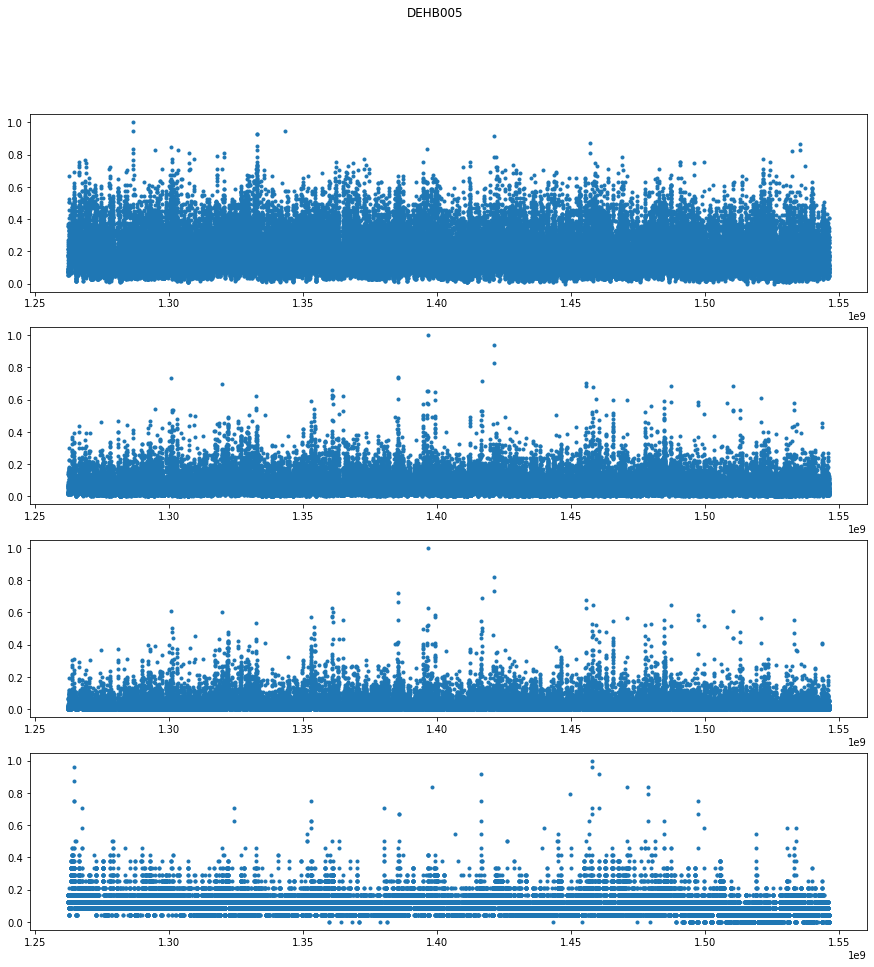

In [6]:
for station in stations[:station_no]:
    data_station = data[data[:, 9] == station[1]]
    time = data_station[:, 0]
    no2_raw, nox_raw, no_raw, co_raw = data_station[:, [2]], data_station[:, [3]], data_station[:, [4]], data_station[:, [7]]
    
    scaler_no2, scaler_nox, scaler_no, scaler_co = MinMaxScaler(), MinMaxScaler(), MinMaxScaler(), MinMaxScaler()
    no2 = scaler_no2.fit_transform(no2_raw)[:, 0]
    nox = scaler_nox.fit_transform(nox_raw)[:, 0]
    no = scaler_no.fit_transform(no_raw)[:, 0]
    co = scaler_co.fit_transform(co_raw)[:, 0]
    
    fig, axs = plt.subplots(4)
    fig.suptitle(f'{station[1]}')
    fig.set_figheight(15)
    fig.set_figwidth(15)
    axs[0].plot(time, no2, '.')
    axs[1].plot(time, nox, '.')
    axs[2].plot(time, no, '.')
    axs[3].plot(time, co, '.')

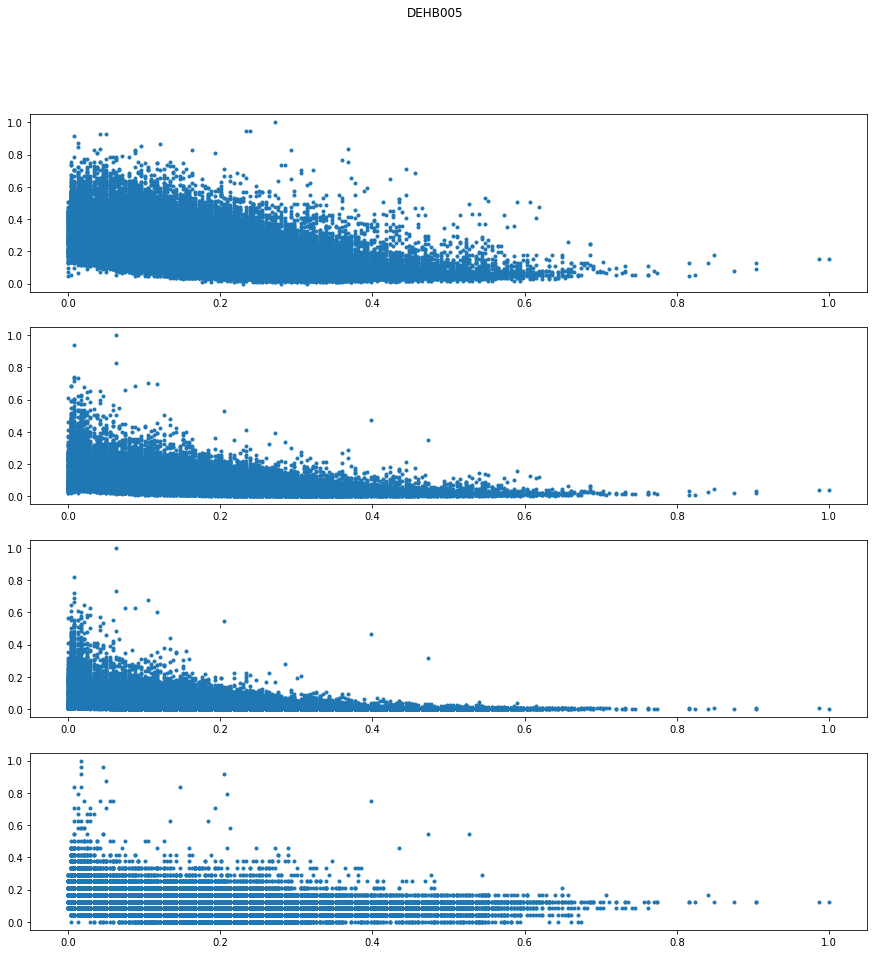

In [7]:
for station in stations[:station_no]:
    data_station = data[data[:, 9] == station[1]]
    time = data_station[:, 0]
    no2_raw, nox_raw, no_raw, co_raw = data_station[:, [2]], data_station[:, [3]], data_station[:, [4]], data_station[:, [7]]
    o3_raw = data_station[:, [5]]
    
    scaler_no2, scaler_nox, scaler_no, scaler_co = MinMaxScaler(), MinMaxScaler(), MinMaxScaler(), MinMaxScaler()
    no2 = scaler_no2.fit_transform(no2_raw)[:, 0]
    nox = scaler_nox.fit_transform(nox_raw)[:, 0]
    no = scaler_no.fit_transform(no_raw)[:, 0]
    co = scaler_co.fit_transform(co_raw)[:, 0]
    
    scaler_o3 = MinMaxScaler()
    o3 = scaler_o3.fit_transform(o3_raw)[:, 0]
    
    fig, axs = plt.subplots(4)
    fig.suptitle(f'{station[1]}')
    fig.set_figheight(15)
    fig.set_figwidth(15)
    axs[0].plot(o3, no2, '.')
    axs[1].plot(o3, nox, '.')
    axs[2].plot(o3, no, '.')
    axs[3].plot(o3, co, '.')

[1262304000 1262307600 1262311200 ... 1546290000 1546293600 1546297200]
                  O3       NO2       NOx        NO        CO
2010-01-01  0.230886  0.094185  0.023441  0.002525  0.162879
2010-01-02  0.141118  0.269042  0.094170  0.034452  0.142045
2010-01-03  0.198745  0.266175  0.117815  0.062229  0.090909
2010-01-04  0.255958  0.189973  0.060928  0.018288  0.101449
2010-01-05  0.238874  0.151106  0.043824  0.010281  0.109127


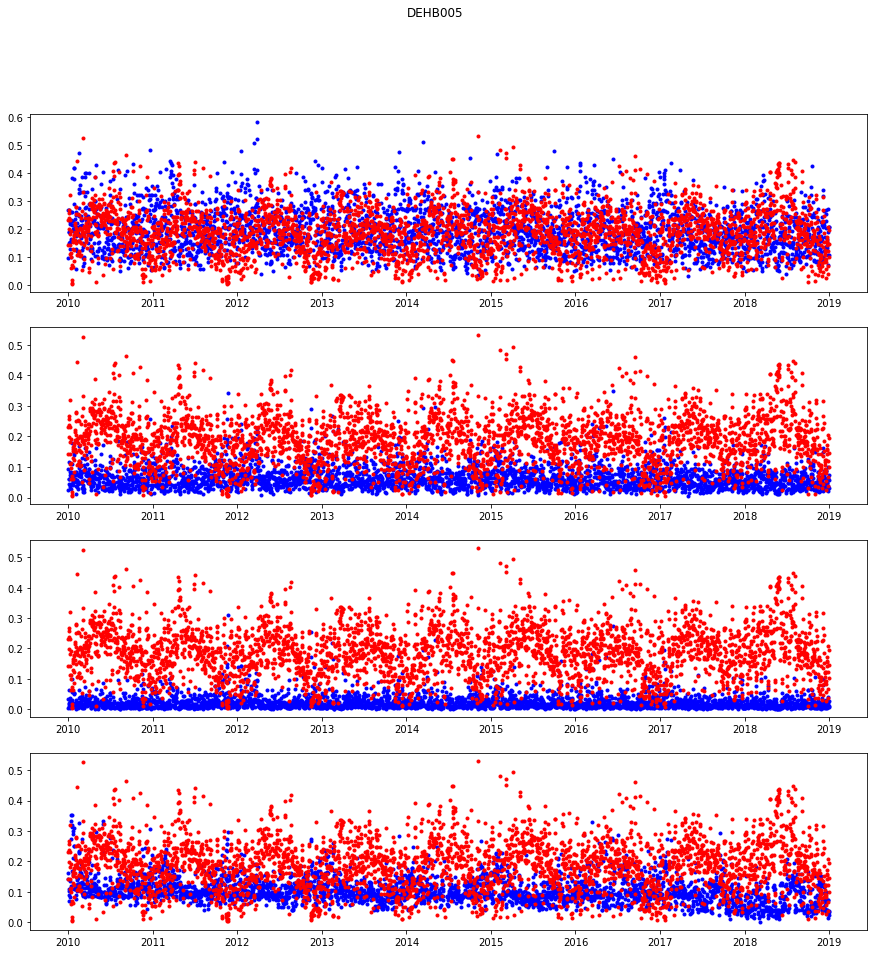

In [8]:
for station in stations[:station_no]:
    data_station = data[data[:, 9] == station[1]]
    print(data_station[:, 0])
    
    df_dailies = pd.DataFrame(index=pd.to_datetime(data_station[:, 0], unit = 's'), columns=['O3', 'NO2', 'NOx', 'NO', 'CO'])
    
    time = data_station[:, 0]
    no2_raw, nox_raw, no_raw, co_raw = data_station[:, [2]], data_station[:, [3]], data_station[:, [4]], data_station[:, [7]]
    o3_raw = data_station[:, [5]]
    
    scaler_no2, scaler_nox, scaler_no, scaler_co = MinMaxScaler(), MinMaxScaler(), MinMaxScaler(), MinMaxScaler()
    no2 = scaler_no2.fit_transform(no2_raw)[:, 0]
    nox = scaler_nox.fit_transform(nox_raw)[:, 0]
    no = scaler_no.fit_transform(no_raw)[:, 0]
    co = scaler_co.fit_transform(co_raw)[:, 0]
    
    df_dailies['NO2'] = no2
    df_dailies['NOx'] = nox
    df_dailies['NO'] = no
    df_dailies['CO'] = co
    
    scaler_o3 = MinMaxScaler()
    o3 = scaler_o3.fit_transform(o3_raw)[:, 0]
    
    df_dailies['O3'] = o3
    
    # Resample hourly data to daily
    df_dailies = df_dailies.resample('D', origin='start').mean()
    
    print(df_dailies.head())
    
    fig, axs = plt.subplots(4)
    fig.suptitle(f'{station[1]}')
    fig.set_figheight(15)
    fig.set_figwidth(15)
    axs[0].plot(df_dailies.index, df_dailies['NO2'], '.', color='blue')
    axs[0].plot(df_dailies.index, df_dailies['O3'], '.', color='red')
    axs[1].plot(df_dailies.index, df_dailies['NOx'], '.', color='blue')
    axs[1].plot(df_dailies.index, df_dailies['O3'], '.', color='red')
    axs[2].plot(df_dailies.index, df_dailies['NO'], '.', color='blue')
    axs[2].plot(df_dailies.index, df_dailies['O3'], '.', color='red')
    axs[3].plot(df_dailies.index, df_dailies['CO'], '.', color='blue')
    axs[3].plot(df_dailies.index, df_dailies['O3'], '.', color='red')

[1262304000 1262307600 1262311200 ... 1546290000 1546293600 1546297200]
                           O3       NO2       NOx        NO        CO
2010-01-01 00:00:00  0.196653  0.162162  0.040359  0.003968  0.166667
2010-01-01 01:00:00  0.225941  0.126126  0.029148  0.003968  0.166667
2010-01-01 02:00:00  0.238494  0.090090  0.022422  0.003968  0.166667
2010-01-01 03:00:00  0.230126  0.099099  0.024664  0.000000  0.166667
2010-01-01 04:00:00  0.242678  0.081081  0.020179  0.003968  0.166667


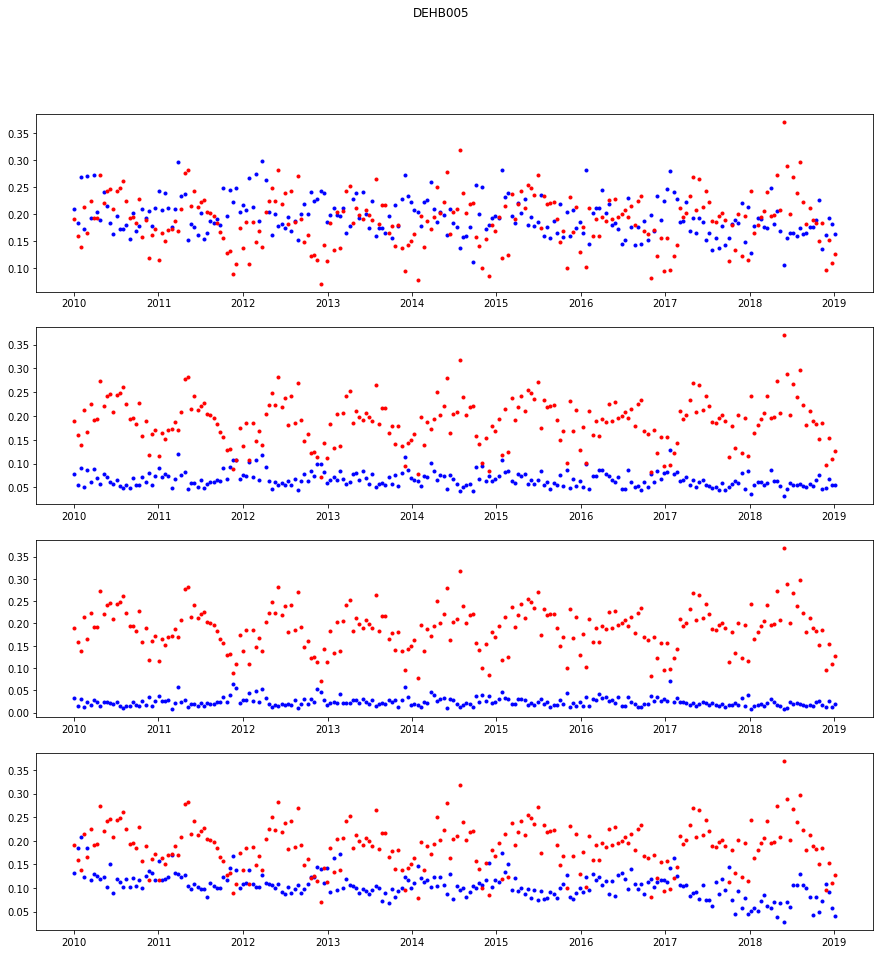

In [9]:
for station in stations[:station_no]:
    data_station = data[data[:, 9] == station[1]]
    print(data_station[:, 0])
    
    df_dailies = pd.DataFrame(index=pd.to_datetime(data_station[:, 0], unit = 's'), columns=['O3', 'NO2', 'NOx', 'NO', 'CO'])
    
    time = data_station[:, 0]
    no2_raw, nox_raw, no_raw, co_raw = data_station[:, [2]], data_station[:, [3]], data_station[:, [4]], data_station[:, [7]]
    o3_raw = data_station[:, [5]]
    
    scaler_no2, scaler_nox, scaler_no, scaler_co = MinMaxScaler(), MinMaxScaler(), MinMaxScaler(), MinMaxScaler()
    no2 = scaler_no2.fit_transform(no2_raw)[:, 0]
    nox = scaler_nox.fit_transform(nox_raw)[:, 0]
    no = scaler_no.fit_transform(no_raw)[:, 0]
    co = scaler_co.fit_transform(co_raw)[:, 0]
    
    df_dailies['NO2'] = no2
    df_dailies['NOx'] = nox
    df_dailies['NO'] = no
    df_dailies['CO'] = co
    
    scaler_o3 = MinMaxScaler()
    o3 = scaler_o3.fit_transform(o3_raw)[:, 0]
    
    df_dailies['O3'] = o3
    
    # Resample hourly data to daily
    df_twoweeklies = df_dailies.resample('2W', origin='start').mean()
    
    print(df_dailies.head())
    
    fig, axs = plt.subplots(4)
    fig.suptitle(f'{station[1]}')
    fig.set_figheight(15)
    fig.set_figwidth(15)
    axs[0].plot(df_twoweeklies.index, df_twoweeklies['NO2'], '.', color='blue')
    axs[0].plot(df_twoweeklies.index, df_twoweeklies['O3'], '.', color='red')
    axs[1].plot(df_twoweeklies.index, df_twoweeklies['NOx'], '.', color='blue')
    axs[1].plot(df_twoweeklies.index, df_twoweeklies['O3'], '.', color='red')
    axs[2].plot(df_twoweeklies.index, df_twoweeklies['NO'], '.', color='blue')
    axs[2].plot(df_twoweeklies.index, df_twoweeklies['O3'], '.', color='red')
    axs[3].plot(df_twoweeklies.index, df_twoweeklies['CO'], '.', color='blue')
    axs[3].plot(df_twoweeklies.index, df_twoweeklies['O3'], '.', color='red')

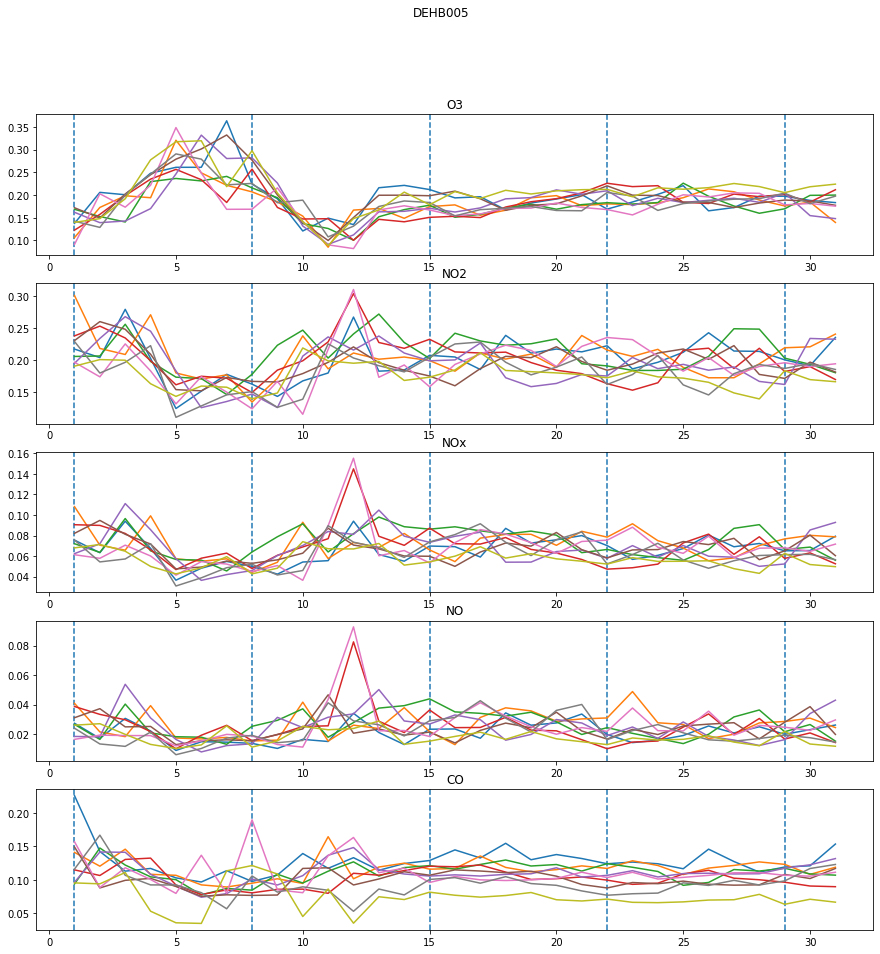

In [10]:
for station in stations[:station_no]:
    data_station = data[data[:, 9] == station[1]]
    
    df_dailies = pd.DataFrame(index=pd.to_datetime(data_station[:, 0], unit = 's'), columns=['O3', 'NO2', 'NOx', 'NO', 'CO'])
    
    time = data_station[:, 0]
    no2_raw, nox_raw, no_raw, co_raw = data_station[:, [2]], data_station[:, [3]], data_station[:, [4]], data_station[:, [7]]
    o3_raw = data_station[:, [5]]
    
    scaler_no2, scaler_nox, scaler_no, scaler_co = MinMaxScaler(), MinMaxScaler(), MinMaxScaler(), MinMaxScaler()
    no2 = scaler_no2.fit_transform(no2_raw)[:, 0]
    nox = scaler_nox.fit_transform(nox_raw)[:, 0]
    no = scaler_no.fit_transform(no_raw)[:, 0]
    co = scaler_co.fit_transform(co_raw)[:, 0]
    
    df_dailies['NO2'] = no2
    df_dailies['NOx'] = nox
    df_dailies['NO'] = no
    df_dailies['CO'] = co
    
    scaler_o3 = MinMaxScaler()
    o3 = scaler_o3.fit_transform(o3_raw)[:, 0]
    
    df_dailies['O3'] = o3
    
    # Resample hourly data to daily
    df_dailies = df_dailies.resample('D', origin='start').mean()
    
    df_dailies_o3 = df_dailies['O3']

    # Pivot for each day
    pv_o3 = pd.pivot_table(df_dailies, index=df_dailies_o3.index.day, columns=df_dailies_o3.index.year, values='O3', aggfunc='mean')

    df_dailies_no2 = df_dailies['NO2']

    # Pivot for each day
    pv_no2 = pd.pivot_table(df_dailies, index=df_dailies_no2.index.day, columns=df_dailies_no2.index.year, values='NO2', aggfunc='mean')

    df_dailies_nox = df_dailies['NOx']

    # Pivot for each day
    pv_nox = pd.pivot_table(df_dailies, index=df_dailies_nox.index.day, columns=df_dailies_nox.index.year, values='NOx', aggfunc='mean')

    df_dailies_no = df_dailies['NO']

    # Pivot for each day
    pv_no = pd.pivot_table(df_dailies, index=df_dailies_no.index.day, columns=df_dailies_no.index.year, values='NO', aggfunc='mean')

    df_dailies_co = df_dailies['CO']

    # Pivot for each day
    pv_co = pd.pivot_table(df_dailies, index=df_dailies_co.index.day, columns=df_dailies_co.index.year, values='CO', aggfunc='mean')

    fig, axs = plt.subplots(5)
    fig.suptitle(f'{station[1]}')
    fig.set_figheight(15)
    fig.set_figwidth(15)

    verticals = [1, 8, 15, 22, 29]
    for ax in axs:
        for x in verticals:
            ax.axvline(x=x, linestyle='--')

    axs[0].plot(pv_o3)
    axs[0].set_title('O3', loc='center')
    axs[1].plot(pv_no2)
    axs[1].set_title('NO2', loc='center')
    axs[2].plot(pv_nox)
    axs[2].set_title('NOx', loc='center')
    axs[3].plot(pv_no)
    axs[3].set_title('NO', loc='center')
    axs[4].plot(pv_co)
    axs[4].set_title('CO', loc='center')
    
#     fig.savefig('DailyAveragesOverMonthsPerYear', dpi=300, facecolor='w')    

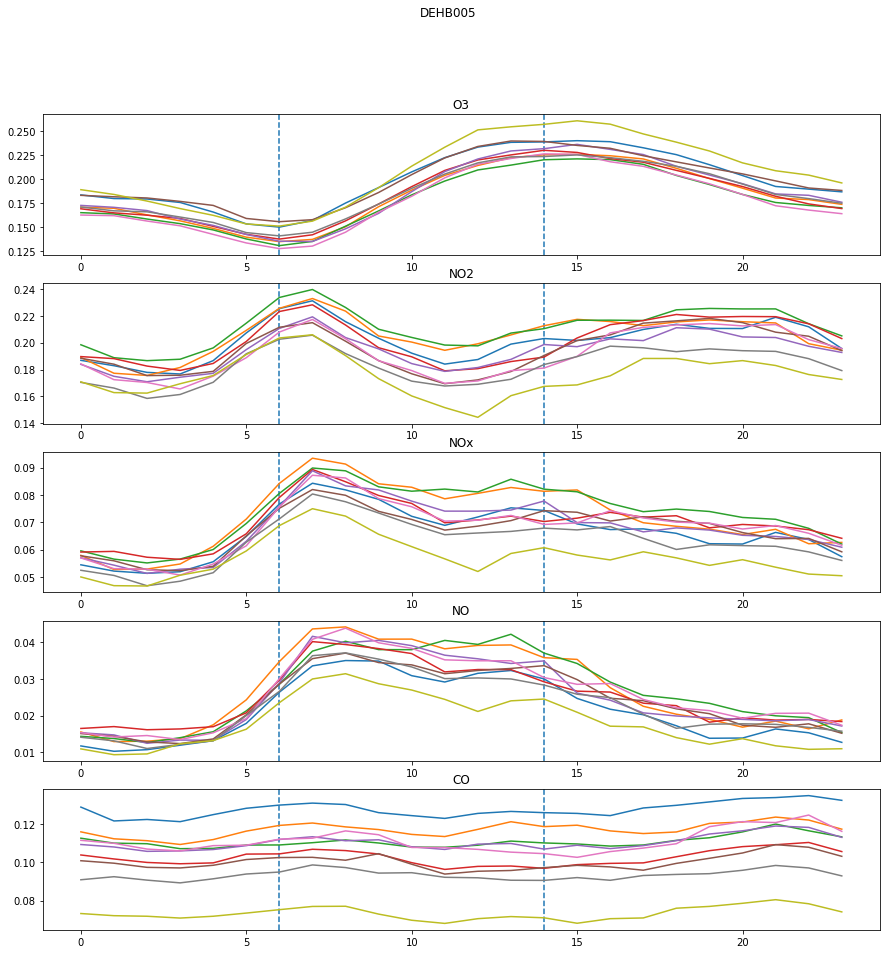

In [11]:
for station in stations[:station_no]:
    data_station = data[data[:, 9] == station[1]]
    
    df_dailies = pd.DataFrame(index=pd.to_datetime(data_station[:, 0], unit = 's'), columns=['O3', 'NO2', 'NOx', 'NO', 'CO'])
    
    time = data_station[:, 0]
    no2_raw, nox_raw, no_raw, co_raw = data_station[:, [2]], data_station[:, [3]], data_station[:, [4]], data_station[:, [7]]
    o3_raw = data_station[:, [5]]
    
    scaler_no2, scaler_nox, scaler_no, scaler_co = MinMaxScaler(), MinMaxScaler(), MinMaxScaler(), MinMaxScaler()
    no2 = scaler_no2.fit_transform(no2_raw)[:, 0]
    nox = scaler_nox.fit_transform(nox_raw)[:, 0]
    no = scaler_no.fit_transform(no_raw)[:, 0]
    co = scaler_co.fit_transform(co_raw)[:, 0]
    
    df_dailies['NO2'] = no2
    df_dailies['NOx'] = nox
    df_dailies['NO'] = no
    df_dailies['CO'] = co

    scaler_o3 = MinMaxScaler()
    o3 = scaler_o3.fit_transform(o3_raw)[:, 0]
    
    df_dailies['O3'] = o3
    
    # Resample hourly data to daily
    # df_dailies = df_dailies.resample('D', origin='start').mean()
    
    df_dailies_o3 = df_dailies['O3']

    # Pivot for each day
    pv_o3 = pd.pivot_table(df_dailies, index=df_dailies_o3.index.hour, columns=df_dailies_o3.index.year, values='O3', aggfunc='mean')

    df_dailies_no2 = df_dailies['NO2']

    # Pivot for each day
    pv_no2 = pd.pivot_table(df_dailies, index=df_dailies_no2.index.hour, columns=df_dailies_no2.index.year, values='NO2', aggfunc='mean')

    df_dailies_nox = df_dailies['NOx']

    # Pivot for each day
    pv_nox = pd.pivot_table(df_dailies, index=df_dailies_nox.index.hour, columns=df_dailies_nox.index.year, values='NOx', aggfunc='mean')

    df_dailies_no = df_dailies['NO']

    # Pivot for each day
    pv_no = pd.pivot_table(df_dailies, index=df_dailies_no.index.hour, columns=df_dailies_no.index.year, values='NO', aggfunc='mean')

    df_dailies_co = df_dailies['CO']

    # Pivot for each day
    pv_co = pd.pivot_table(df_dailies, index=df_dailies_co.index.hour, columns=df_dailies_co.index.year, values='CO', aggfunc='mean')

    fig, axs = plt.subplots(5)
    fig.suptitle(f'{station[1]}')
    fig.set_figheight(15)
    fig.set_figwidth(15)

    verticals = [6, 14]
    for ax in axs:
        for x in verticals:
            ax.axvline(x=x, linestyle='--')

    axs[0].plot(pv_o3)
    axs[0].set_title('O3', loc='center')
    axs[1].plot(pv_no2)
    axs[1].set_title('NO2', loc='center')
    axs[2].plot(pv_nox)
    axs[2].set_title('NOx', loc='center')
    axs[3].plot(pv_no)
    axs[3].set_title('NO', loc='center')
    axs[4].plot(pv_co)
    axs[4].set_title('CO', loc='center')
    
#     fig.savefig('DailyAveragesOverWeeksPerYear', dpi=300, facecolor='w')